# Исследование датасета CPU Intel

## Описание датасета
В файле содержатся сведения о процессорах Intel. 
Поля: 
* DorM - признак десктоп \ мобильный процессор; 
* Cache(M) - объем кэша в Мб; 
* Cores - количество ядер; 
* Threads - колчисетво потоков на ядро; * Speed(GHz) - скорость в ГГц; 
* Price - цена в USD;
* Name - название;

## Импорт данных
Предварительно внешними средствами были заменены символы разделители ","->";" (т.к. в последнем столбце символ "," использовался для разделения разрядов). 

In [1]:
from google.colab import files
uploaded = files.upload()

Saving CPU-prices-Desktop-Mobile.csv to CPU-prices-Desktop-Mobile.csv


In [2]:

import pandas as pd
df = pd.read_csv('CPU-prices-Desktop-Mobile.csv', sep=";")


## Предварительное исследование датасета


In [ ]:
df.head()

,DorM,Cache(M),Cores,Threads,Speed(GHz),Price,Name
0,1,24.75,18,36,3.0,1979,i9-9980XE
1,1,24.75,18,36,2.6,1979,i9-7980XE
2,1,22.00,16,32,3.1,1684,i9-9960X
3,1,22.00,16,32,2.8,1684,i9-7960X
4,1,19.25,14,28,3.3,1387,i9-9940X


In [ ]:
df.describe()

,DorM,Cores,Threads,Price
count,225.000000,225.000000,225.000000,225.000000
mean,0.497778,3.822222,6.622222,352.986667
std,0.501110,2.803767,5.741799,315.182111
min,0.000000,2.000000,2.000000,42.000000
25%,0.000000,2.000000,4.000000,182.000000
50%,0.000000,4.000000,4.000000,281.000000
75%,1.000000,4.000000,8.000000,393.000000
max,1.000000,18.000000,36.000000,1979.000000


Всего 225 записей, что кажется недостаточным для анализа.

In [ ]:
df.isna().sum()

DorM          0
Cache(M)      0
Cores         0
Threads       0
Speed(GHz)    0
Price         0
Name          0
dtype: int64

Зато нет пустых полей со значением Nan

In [ ]:
df['DorM'].value_counts()

0    113
1    112
Name: DorM, dtype: int64

Классы Мобильный \ Десктопный представлены практически одинакого

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DorM        225 non-null    int64  
 1   Cache(M)    225 non-null    float64
 2   Cores       225 non-null    int64  
 3   Threads     225 non-null    int64  
 4   Speed(GHz)  225 non-null    float64
 5   Price       225 non-null    int64  
 6   Name        225 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 12.4+ KB


Типы данных позволяют делать рассчеты.

In [4]:
df.mean()

<ipython-input-4-c61f0c8f89b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


DorM            0.497778
Cache(M)        6.373333
Cores           3.822222
Threads         6.622222
Speed(GHz)      2.758667
Price         352.986667
dtype: float64

Например, посчитать среднее.

In [ ]:
df.groupby(["DorM","Cores"])["Price"].mean()

DorM  Cores
0     2         322.542857
      4         427.578947
      6         489.200000
1     2          87.794872
      4         217.076923
      6         316.500000
      8         688.000000
      10       1147.500000
      12       1189.000000
      14       1387.000000
      16       1684.000000
      18       1979.000000
Name: Price, dtype: float64

Или среднюю цена c группировкой по классам и ядрам

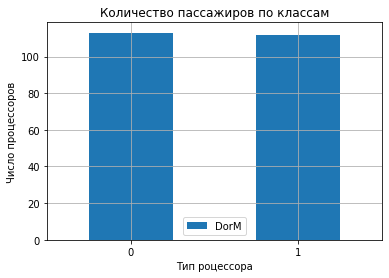

In [ ]:
df['DorM'].value_counts().plot(
    kind='bar',
    rot=0, 
    title='Количество пассажиров по классам', 
    xlabel='Тип роцессора',
    ylabel='Число процессоров',
    legend=True,
    grid=True
);